# Data Analyst Job Analysis (EDA Project)

This project explores a **Data Analyst jobs dataset** to understand:
- Top hiring locations
- Salary trends and distribution
- Company-wise hiring insights
- Experience demand
- Most in-demand skills from job descriptions

* Tools used: **Python, Pandas, NumPy, Matplotlib, Seaborn**

In [26]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
import seaborn as sns

os.makedirs("../images", exist_ok=True)
sns.set_theme(style="whitegrid", context="talk")

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10


In [3]:
df = pd.read_csv("../data/DataAnalyst.csv")
df.head()


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


### Initial Data Inspection

We inspect:
- dataset shape
- column names & datatypes
- missing values summary


In [5]:
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (2253, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dty

### Missing values

In [6]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Values": missing,
    "Percentage (%)": missing_percent.round(2)
})

missing_df[missing_df["Missing Values"] > 0]


,Missing Values,Percentage (%)
Company Name,1,0.04


In [7]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


### Data Cleaning

In [9]:

if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

df["Company Name"] = df["Company Name"].fillna("Unknown")

df["Company Name"] = df["Company Name"].astype(str).str.replace(r"\n.*", "", regex=True)

df["Rating"] = df["Rating"].fillna(df["Rating"].median())


## Salary Feature Engineering

The salary column contains strings like:
`37K-66K (Glassdoor est.)`

We extract:
- minimum salary
- maximum salary
- average salary


In [10]:
def clean_salary(salary_text):
    if pd.isna(salary_text):
        return np.nan, np.nan
    salary_text = salary_text.lower()
    salary_text = salary_text.replace("(glassdoor est.)", "").replace("(employer est.)", "")
    salary_text = salary_text.replace("$", "").replace("k", "").strip()

    salary_text = re.sub(r"[^\d\-]", "", salary_text)

    try:
        min_sal, max_sal = salary_text.split("-")
        return int(min_sal), int(max_sal)
    except:
        return np.nan, np.nan

df[["min_salary", "max_salary"]] = df["Salary Estimate"].apply(lambda x: pd.Series(clean_salary(x)))

df["avg_salary"] = (df["min_salary"] + df["max_salary"]) / 2
df.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary,avg_salary
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37.0,66.0,51.5
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,37.0,66.0,51.5
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,37.0,66.0,51.5
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,37.0,66.0,51.5
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37.0,66.0,51.5


## WordCloud (Job Description Insights)

A word cloud is used to visualize the most frequently used keywords in job descriptions.
Bigger words indicate higher frequency across postings.


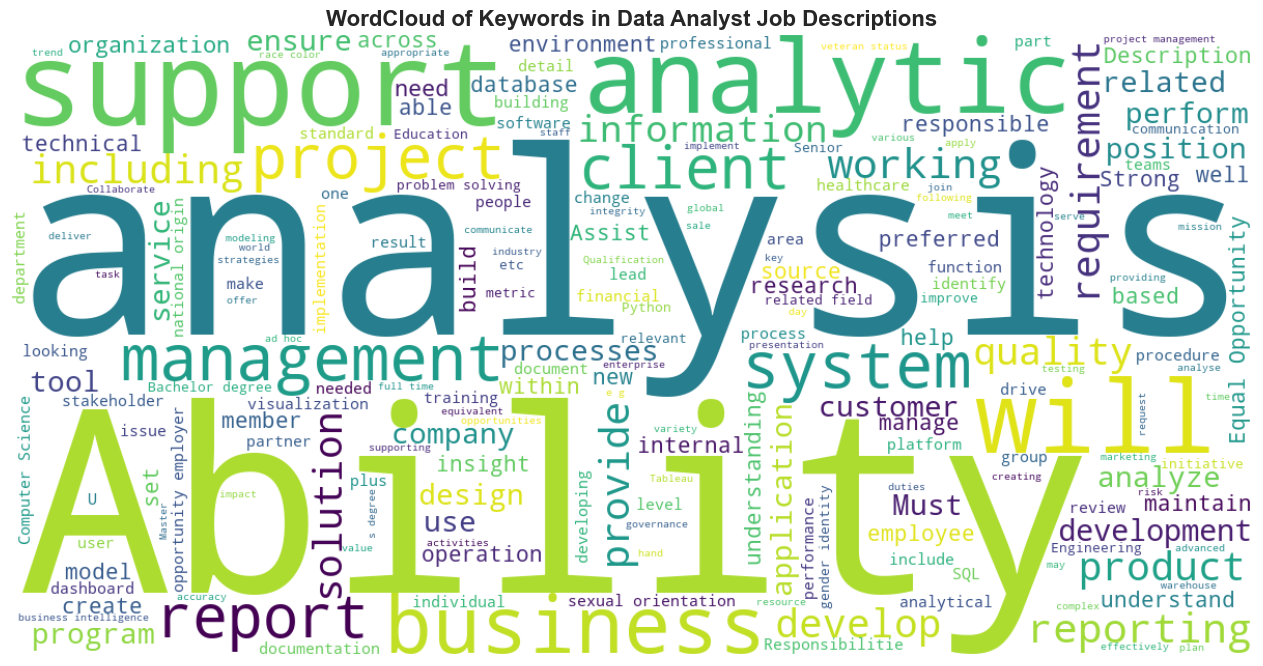

In [29]:
from wordcloud import WordCloud, STOPWORDS

# Combine all job descriptions
all_text = " ".join(df["Job Description"].dropna().astype(str))

# Stopwords: remove common words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    "data", "analyst", "work", "team", "experience", "years",
    "job", "skills", "role", "using", "required", "knowledge"
])

# Create WordCloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    stopwords=custom_stopwords,
    colormap="viridis", 
    max_words=200
).generate(all_text)

# Plot
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Keywords in Data Analyst Job Descriptions", weight="bold")
plt.tight_layout()

# Save
plt.savefig("../images/job_description_wordcloud.png", dpi=300, bbox_inches="tight")
plt.show()


## Salary Distribution

We visualize the salary distribution to understand pay trends across job listings.


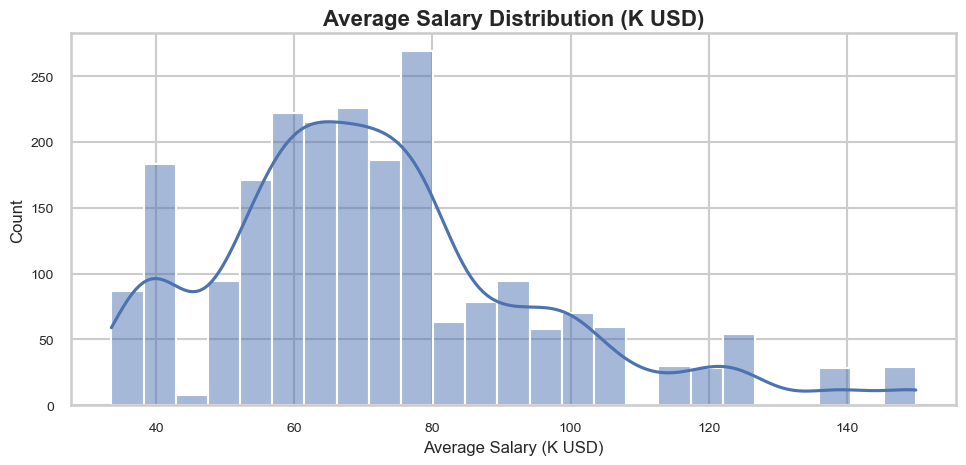

In [13]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df["avg_salary"].dropna(), kde=True, bins=25)

plt.title("Average Salary Distribution (K USD)", weight="bold")
plt.xlabel("Average Salary (K USD)")
plt.ylabel("Count")
plt.tight_layout()

plt.savefig("../images/salary_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


## Location-wise Job Analysis

This section identifies the top locations with the highest number of Data Analyst job openings.


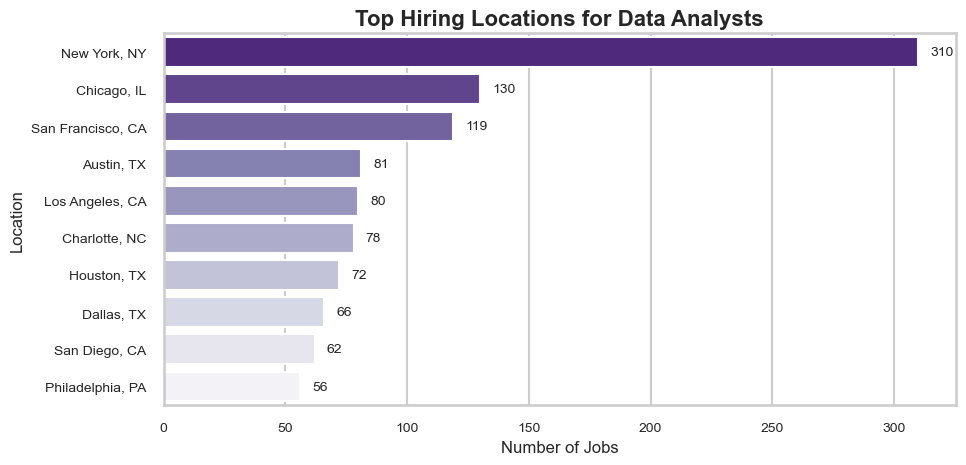

In [14]:
location_counts = df["Location"].value_counts().head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(
    x=location_counts.values,
    y=location_counts.index,
    hue=location_counts.index,
    palette="Purples_r",
    legend=False
)

for i, v in enumerate(location_counts.values):
    ax.text(v + 5, i, str(v), va="center", fontsize=10)

plt.title("Top Hiring Locations for Data Analysts", weight="bold")
plt.xlabel("Number of Jobs")
plt.ylabel("Location")
plt.tight_layout()

plt.savefig("../images/top_locations.png", dpi=300, bbox_inches="tight")
plt.show()


## Top Hiring Companies

This visualization highlights companies hiring the most Data Analysts.


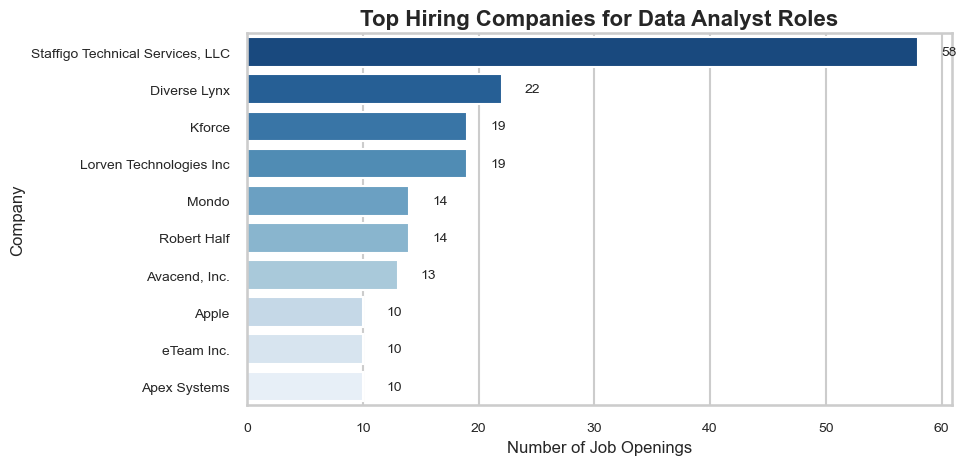

In [15]:
top_companies = df["Company Name"].value_counts().head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(
    x=top_companies.values,
    y=top_companies.index,
    hue=top_companies.index,
    palette="Blues_r",
    legend=False
)

for i, v in enumerate(top_companies.values):
    ax.text(v + 2, i, str(v), va="center", fontsize=10)

plt.title("Top Hiring Companies for Data Analyst Roles", weight="bold")
plt.xlabel("Number of Job Openings")
plt.ylabel("Company")
plt.tight_layout()

plt.savefig("../images/top_hiring_companies.png", dpi=300, bbox_inches="tight")
plt.show()


## Experience Level Distribution

We extract experience level from job descriptions:
- Entry Level
- Mid Level
- Senior Level


In [16]:
def extract_experience(text):
    text = str(text).lower()
    if "0-2" in text or "1-2" in text or "entry" in text:
        return "Entry Level"
    elif "3-5" in text or "2-4" in text:
        return "Mid Level"
    elif "5+" in text or "senior" in text or "7+" in text:
        return "Senior Level"
    else:
        return "Not Specified"

df["experience_level"] = df["Job Description"].apply(extract_experience)

experience_counts = df["experience_level"].value_counts()
experience_counts


experience_level
Not Specified    1331
Senior Level      631
Entry Level       186
Mid Level         105
Name: count, dtype: int64

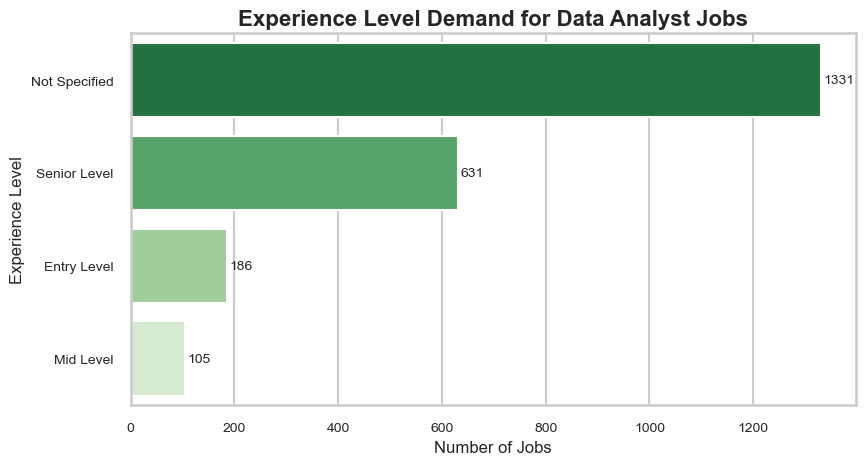

In [17]:
plt.figure(figsize=(9,5))
ax = sns.barplot(
    x=experience_counts.values,
    y=experience_counts.index,
    hue=experience_counts.index,
    palette="Greens_r",
    legend=False
)

for i, v in enumerate(experience_counts.values):
    ax.text(v + 5, i, str(v), va="center", fontsize=10)

plt.title("Experience Level Demand for Data Analyst Jobs", weight="bold")
plt.xlabel("Number of Jobs")
plt.ylabel("Experience Level")
plt.tight_layout()

plt.savefig("../images/experience_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


## Skills Demand Analysis

We extract key skills from job descriptions and count how frequently they appear.


In [18]:
skills_list = ["python", "sql", "excel", "tableau", "power bi", "r", "statistics", "machine learning"]

def extract_skills(text):
    text = str(text).lower()
    return [skill for skill in skills_list if skill in text]

df["skills"] = df["Job Description"].apply(extract_skills)
skills_exploded = df["skills"].explode()
skill_counts = skills_exploded.value_counts()
skill_counts


skills
r                   2252
sql                 1389
excel               1354
python               637
tableau              620
statistics           563
machine learning     180
power bi             180
Name: count, dtype: int64

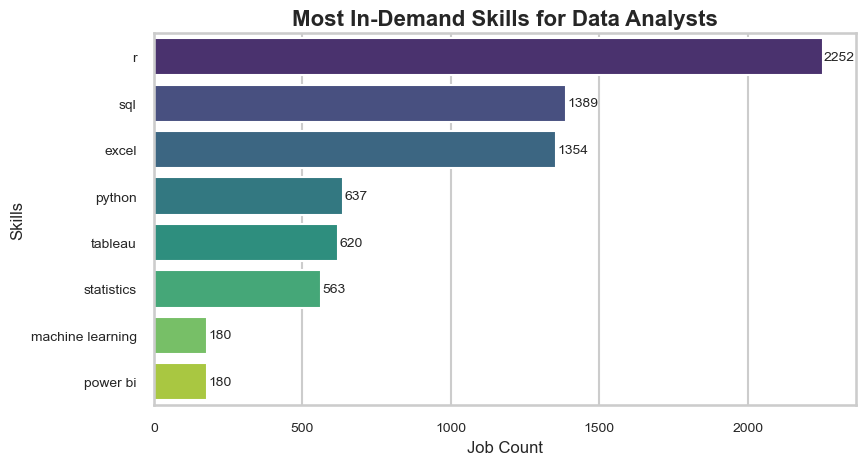

In [20]:
plt.figure(figsize=(9,5))
ax = sns.barplot(
    x=skill_counts.values,
    y=skill_counts.index,
    hue=skill_counts.index,
    palette="viridis",
    legend=False
)

for i, v in enumerate(skill_counts.values):
    ax.text(v + 5, i, str(v), va="center", fontsize=10)

plt.title("Most In-Demand Skills for Data Analysts", weight="bold")
plt.xlabel("Job Count")
plt.ylabel("Skills")
plt.tight_layout()

plt.savefig("../images/skills_demand.png", dpi=300, bbox_inches="tight")
plt.show()


## Conclusion

Key insights from this analysis:
- Certain cities dominate hiring for Data Analyst roles.
- Salary distribution shows most roles fall in mid-range.
- A few companies consistently hire Data Analysts.
- SQL, Python and Excel are the most demanded skills.

## Challenges Faced

- Salary values were messy and required extraction from text.
- Many job descriptions were unstructured (text cleaning needed).
- Some fields had missing values that needed careful handling.